<a href="https://colab.research.google.com/github/melihkurtaran/DNA_hackathon/blob/numpy/MainCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install gif2numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for gif2numpy: filename=gif2numpy-1.3-py2.py3-none-any.whl size=8392 sha256=e88c7425c1e1b7bbe4f4739c3c8c2e84bad7f721143ec839461d32ecdc5c263e
  Stored in directory: /root/.cache/pip/wheels/7d/70/75/7e42205c427015e223944d47ea89e01dc779fb49ba664fb743
Successfully built gif2numpy


In [3]:
import gif2numpy
import cv2
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image,ImageDraw

%matplotlib inline
import numpy as np

In [6]:
!unzip "/content/drive/MyDrive/EDISS Winter School/EDISS_winter_school/aemet.zip" -d "/content/drive/MyDrive/EDISS Winter School/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/EDISS Winter School/__MACOSX/aemet/10min/pm/20220123/._aemet_pm_202201231410.gif  
  inflating: /content/drive/MyDrive/EDISS Winter School/aemet/10min/pm/20220123/aemet_pm_202201230120.gif  
  inflating: /content/drive/MyDrive/EDISS Winter School/__MACOSX/aemet/10min/pm/20220123/._aemet_pm_202201230120.gif  
  inflating: /content/drive/MyDrive/EDISS Winter School/aemet/10min/pm/20220123/aemet_pm_202201230450.gif  
  inflating: /content/drive/MyDrive/EDISS Winter School/__MACOSX/aemet/10min/pm/20220123/._aemet_pm_202201230450.gif  
  inflating: /content/drive/MyDrive/EDISS Winter School/aemet/10min/pm/20220123/aemet_pm_202201231000.gif  
  inflating: /content/drive/MyDrive/EDISS Winter School/__MACOSX/aemet/10min/pm/20220123/._aemet_pm_202201231000.gif  
  inflating: /content/drive/MyDrive/EDISS Winter School/aemet/10min/pm/20220123/aemet_pm_202201231940.gif  
  inflating: /content/drive/MyDrive/EDISS

In [ ]:

np_frames, extensions, image_specifications = gif2numpy.convert("/content/aemet_ba_202201010000.gif")

In [ ]:

the_frame = np.array(np_frames[0])

In [ ]:
print(the_frame.shape)

(530, 480, 3)


In [ ]:
h=the_frame.shape[0]
w=the_frame.shape[1]

the_frame =  the_frame[:w,:,:]
the_frame = cv2.cvtColor(the_frame, cv2.COLOR_BGR2RGB)

print(the_frame.shape)

(480, 480, 3)


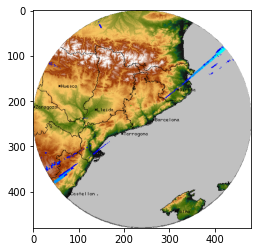

In [ ]:
the_frame_pil = Image.fromarray(the_frame)
alpha = Image.new('L', (the_frame.shape[0],the_frame.shape[1]),0)
draw = ImageDraw.Draw(alpha)
draw.pieslice([0,0,w,w],0,360, fill=255)
npAlpha=np.array(alpha)

the_frame=np.dstack((the_frame,npAlpha))
imshow(the_frame)

In [ ]:
import yaml
from yaml.loader import SafeLoader

# Open the file and load the file
with open('/content/drive/MyDrive/EDISS_winter_school/radars.yaml') as f:
    data = yaml.load(f, Loader=SafeLoader)
    print(data)

In [ ]:
ba_data = data['data']['BA']
ba_data

{'rdr_code': 'ba',
 'latitude': 41.4082,
 'longitude': 1.88499,
 'radius': 240,
 'name': 'Barcelona'}

Latitude: 1 deg = 110.574 km. Longitude: 1 deg = 111.320*cos(latitude) km.

In [ ]:
frame_lat_diff = (1/110.574)
frame_long_diff = 1/(111.320*np.cos(ba_data['latitude']))

41.4082